In [15]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

import shap
import matplotlib.pyplot as plt




In [74]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred , zero_division = 0 ),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }
    return results


In [21]:
df_lr = pd.read_csv('insurance_clean_lr.csv')
df_tree = pd.read_csv('insurance_clean_tree.csv')


In [27]:
from sklearn.model_selection import train_test_split

# For Logistic Regression
X_lr = df_lr.drop('FraudFound', axis=1)
y_lr = df_lr['FraudFound']
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# For Tree-based models
X_tree = df_tree.drop('FraudFound', axis=1)
y_tree = df_tree['FraudFound']
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)


In [31]:
#  Logistic Regression

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_lr, y_train_lr)

results_logreg = evaluate_model(logreg, X_test_lr, y_test_lr, 'Logistic Regression')


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.33      0.01      0.01       197

    accuracy                           0.94      3084
   macro avg       0.63      0.50      0.49      3084
weighted avg       0.90      0.94      0.91      3084



In [68]:
#  Train Decision Tree

dtree = DecisionTreeClassifier(random_state=42 , class_weight='balanced')
dtree.fit(X_train_tree, y_train_tree)

results_tree = evaluate_model(dtree, X_test_tree, y_test_tree, 'Decision Tree')


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2887
           1       0.37      0.34      0.35       197

    accuracy                           0.92      3084
   macro avg       0.66      0.65      0.65      3084
weighted avg       0.92      0.92      0.92      3084



In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tree, y_train_tree)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

results_rf = evaluate_model(rf, X_test_tree, y_test_tree, 'Random Forest with SMOTE')

C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Classification Report for Random Forest with SMOTE:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
#Random Forest

rf = RandomForestClassifier(random_state=42, n_jobs=-1 , class_weight='balanced')
rf.fit(X_train_tree, y_train_tree)

results_rf = evaluate_model(rf, X_test_tree, y_test_tree, 'Random Forest')


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
#  Train XGBoost

# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_clf.fit(X_train_tree, y_train_tree)

# results_xgb = evaluate_model(xgb_clf, X_test_tree, y_test_tree, 'XGBoost')

xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)  # eval_metric in constructor

xgb_clf.fit(X_train_tree, y_train_tree)

results_xgb = evaluate_model(xgb_clf, X_test_tree, y_test_tree, 'XGBoost')



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2887
           1       0.78      0.40      0.53       197

    accuracy                           0.95      3084
   macro avg       0.87      0.69      0.75      3084
weighted avg       0.95      0.95      0.95      3084



In [43]:
# Replace spaces and special chars like ":" with underscores
df_tree.columns = df_tree.columns.str.replace(':', '_', regex=False)
df_tree.columns = df_tree.columns.str.replace(' ', '_', regex=False)
df_tree.columns = df_tree.columns.str.replace('-', '_', regex=False)


In [47]:
# Tree-based models
X_tree = df_tree.drop('FraudFound', axis=1)
y_tree = df_tree['FraudFound']
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

In [49]:
# LightGBM

lgb_train = lgb.Dataset(X_train_tree, label=y_train_tree)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

lgbm = lgb.train(params, lgb_train, num_boost_round=100)

# LightGBM predict
y_pred_proba_lgb = lgbm.predict(X_test_tree)
y_pred_lgb = (y_pred_proba_lgb >= 0.5).astype(int)

results_lgb = {
    'Model': 'LightGBM',
    'Accuracy': accuracy_score(y_test_tree, y_pred_lgb),
    'Precision': precision_score(y_test_tree, y_pred_lgb),
    'Recall': recall_score(y_test_tree, y_pred_lgb),
    'F1 Score': f1_score(y_test_tree, y_pred_lgb),
    'ROC AUC': roc_auc_score(y_test_tree, y_pred_proba_lgb)
}
print(classification_report(y_test_tree, y_pred_lgb))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2887
           1       0.93      0.19      0.31       197

    accuracy                           0.95      3084
   macro avg       0.94      0.59      0.64      3084
weighted avg       0.95      0.95      0.93      3084



In [59]:
# Model comparison summary

results_df = pd.DataFrame([results_logreg, results_tree, results_rf, results_lgb, results_xgb])
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.935798   0.333333  0.005076  0.010000  0.826841
1        Decision Tree  0.909857   0.308057  0.329949  0.318627  0.639689
2        Random Forest  0.936122   0.000000  0.000000  0.000000  0.869845
3             LightGBM  0.947147   0.925000  0.187817  0.312236  0.954522
4              XGBoost  0.954280   0.780000  0.395939  0.525253  0.973607


In [80]:
# Hyperparameter (Random Forest)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_tree, y_train_tree)

print("Best params RF:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

results_rf_tuned = evaluate_model(best_rf, X_test_tree, y_test_tree, 'Random Forest Tuned')


Best params RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Random Forest Tuned:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.02      0.03       197

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.50      3084
weighted avg       0.94      0.94      0.91      3084



In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform


# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_search = RandomizedSearchCV(rf, rf_param_dist, n_iter=20, cv=3, scoring='roc_auc', random_state=42)
rf_search.fit(X_train_tree, y_train_tree)
print("Best RF params:", rf_search.best_params_)

#lightGBM
lgb = LGBMClassifier(random_state=42)
lgb_param_dist = {
    'num_leaves': randint(20, 50),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'feature_fraction': uniform(0.6, 0.4),
    'bagging_fraction': uniform(0.6, 0.4),
    'lambda_l1': uniform(0, 5),
    'lambda_l2': uniform(0, 5)
}
lgb_search = RandomizedSearchCV(lgb, lgb_param_dist, n_iter=20, cv=3, scoring='roc_auc', random_state=42)
lgb_search.fit(X_train_tree, y_train_tree)
print("Best LGB params:", lgb_search.best_params_)


#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5)
}
xgb_search = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=20, cv=3, scoring='roc_auc', random_state=42)
xgb_search.fit(X_train_tree, y_train_tree)
print("Best XGB params:", xgb_search.best_params_)

# 4. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_param_dist = {
    'C': uniform(0.01, 10),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga'],  # saga supports all penalties
    'l1_ratio': uniform(0, 1)  # only used if penalty='elasticnet'
}
lr_search = RandomizedSearchCV(lr, lr_param_dist, n_iter=20, cv=3, scoring='roc_auc', random_state=42)
lr_search.fit(X_train_lr, y_train_lr)
print("Best LR params:", lr_search.best_params_)


C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\bhava\anaconda3\Lib\site-packages\

Best RF params: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 63}
Best LGB params: {'bagging_fraction': 0.6693458614031088, 'feature_fraction': 0.7564242430292963, 'lambda_l1': 0.9111804389403116, 'lambda_l2': 3.7768070515882624, 'learning_rate': 0.13754676234737342, 'max_depth': 8, 'n_estimators': 155, 'num_leaves': 23}


C:\Users\bhava\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\bhava\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\bhava\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\bhava\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best XGB params: {'colsample_bytree': 0.836965827544817, 'gamma': 0.23225206359998862, 'learning_rate': 0.1922634555704315, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 67, 'subsample': 0.9795542149013333}


C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\bhava\anaconda3\Lib\site-packag

Best LR params: {'C': 0.1426496115986653, 'l1_ratio': 0.9422017556848528, 'penalty': 'l2', 'solver': 'saga'}


In [86]:
best_rf = rf_search.best_estimator_
best_lgb = lgb_search.best_estimator_
best_xgb = xgb_search.best_estimator_
best_lr = lr_search.best_estimator_


In [92]:
models = {
    'Random Forest': best_rf,
    'LightGBM': best_lgb,
    'XGBoost': best_xgb,
    'Logistic Regression': best_lr
}

results = []

for name, model in models.items():
    if name == 'Logistic Regression':
        X_eval = X_test_lr
        y_eval = y_test_lr
    else:
        X_eval = X_test_tree
        y_eval = y_test_tree

    y_pred = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:, 1]

    acc = accuracy_score(y_eval, y_pred)
    prec = precision_score(y_eval, y_pred)
    rec = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    roc_auc = roc_auc_score(y_eval, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
1             LightGBM  0.953956   0.789474  0.380711  0.513699  0.979418
2              XGBoost  0.948444   0.816667  0.248731  0.381323  0.969211
0        Random Forest  0.936122   0.000000  0.000000  0.000000  0.862985
3  Logistic Regression  0.935798   0.000000  0.000000  0.000000  0.825927


C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


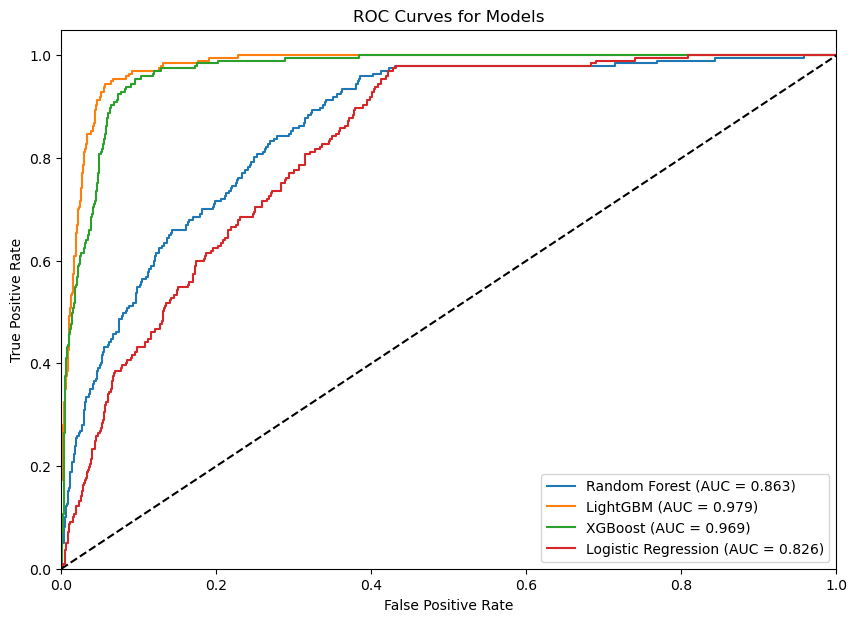

In [94]:
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if name == 'Logistic Regression':
        X_eval = X_test_lr
        y_eval = y_test_lr
    else:
        X_eval = X_test_tree
        y_eval = y_test_tree

    y_proba = model.predict_proba(X_eval)[:, 1]
    fpr, tpr, _ = roc_curve(y_eval, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend(loc='lower right')
plt.show()


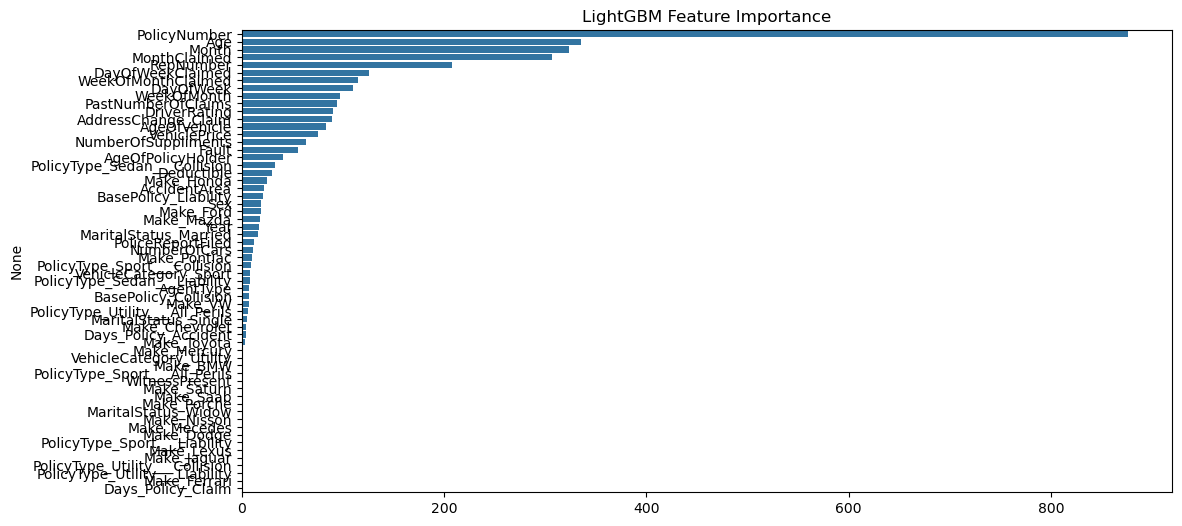

In [100]:
# Feature importance for LightGBM 
feat_imp = pd.Series(best_lgb.feature_importances_, index=X_train_tree.columns)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('LightGBM Feature Importance')
plt.show()


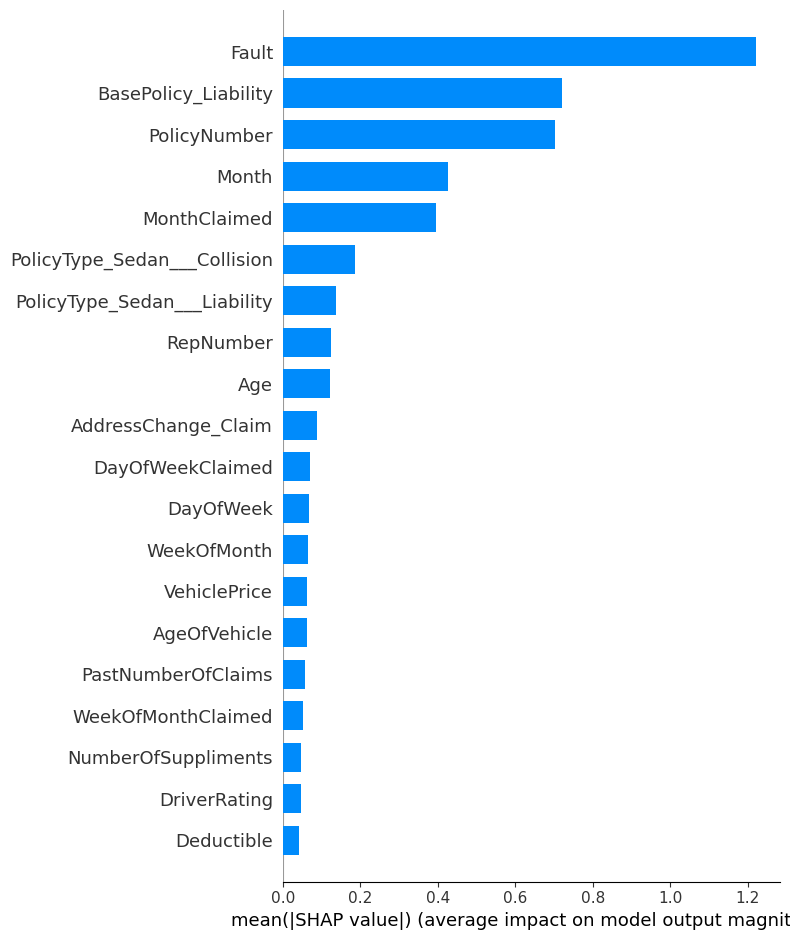

In [102]:
# SHAP explainability for LightGBM
explainer = shap.Explainer(best_lgb)
shap_values = explainer(X_test_tree)

shap.summary_plot(shap_values, X_test_tree, plot_type='bar')


In [ ]:
from sklearn.model_selection import train_test_split

# Set target column
target_col = 'FraudFound'  

# for logictic regression
X_lr = df_lr.drop(columns=[target_col])
y_lr = df_lr[target_col]

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, stratify=y_lr, random_state=42
)


In [ ]:
# for random forest
X_tree = df_tree.drop(columns=[target_col])
y_tree = df_tree[target_col]

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, stratify=y_tree, random_state=42
)



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # limit depth to avoid overfitting
dt_model.fit(X_train_tree, y_train_tree)

y_pred_dt = dt_model.predict(X_test_tree)
y_proba_dt = dt_model.predict_proba(X_test_tree)[:, 1]

print("Decision Tree Classification Report:\n", classification_report(y_test_tree, y_pred_dt))
print("Decision Tree ROC-AUC Score:", roc_auc_score(y_test_tree, y_proba_dt))


In [9]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB 3.3 MB/s eta 0:00:46
   ---------------------------------------- 0.4/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 1.6/150.0 MB 8.7 MB/s eta 0:00:18
    --------------------------------------- 2.6/150.0 MB 12.8 MB/s eta 0:00:12
   - -------------------------------------- 3.9/150.0 MB 13.7 MB/s eta 0:00:11
   - -------------------------------------- 4.9/150.0 MB 17.3 MB/s eta 0:00:09
   - -------------------------------------- 6.0/150.0 MB 15.9 MB/s eta 0:00:10
   -- ------------------------------------- 8.3/150.0 MB 20.4 MB/s eta 0:00:07
   -- ------------------------------------- 8.3/150.0 MB 20.4 MB/s eta 0:00:07
   -- ------------------------------------- 8.8/150.0 MB 17.7 MB/s eta 0:00:08
   -- ------------------------------------- 9.0/150.0 MB 17.5 MB/s eta 

In [3]:
!pip install lightgbm


  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [13]:
!pip install shap


  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/545.2 kB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 512.0/545.2 kB 8.1 MB/s eta 0:00:01
   ------------------------------------- -- 512.0/545.2 kB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 4.3 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
